### 이미지 데이터 증식

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import zipfile

with zipfile.ZipFile('c:/workspace3/data/Mnist/dataset.zip') as zip_ref:  
    zip_ref.extractall('c:/workspace3/data/Mnist/')

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1,data_home='c:/data/mnist', as_frame=False)
mnist.data[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
import numpy as np

X, y = mnist["data"], mnist["target"]
y = y.astype(np.int64)

print(X.shape, y.shape)

(70000, 784) (70000,)


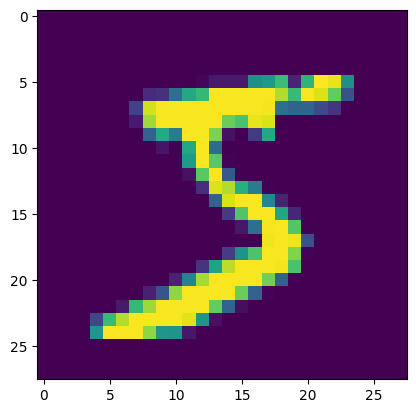

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X[0].reshape(28,28))
plt.show()

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [8]:
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx])
    return shifted_image.reshape([-1])

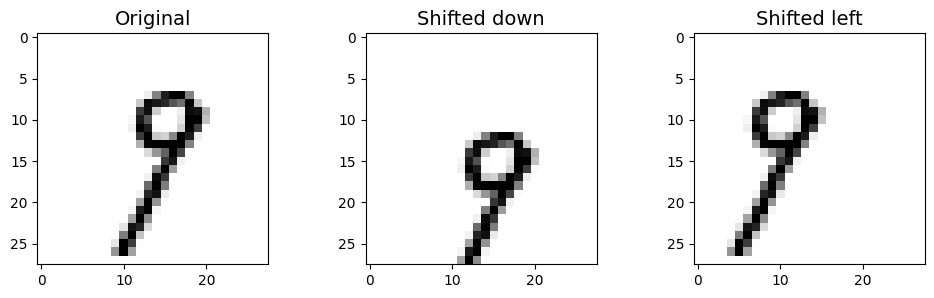

In [9]:
import matplotlib.pyplot as plt

image = X_train[70]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), cmap="Greys")

plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), cmap="Greys")

plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), cmap="Greys")

plt.show()

In [10]:
#오래 걸림
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

#원본 이미지 6만개 + 쉬프트 이미지 24만개 => 30만개로 증식됨
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [11]:
shuffle_idx = np.random.permutation(len(X_train_augmented))

X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [12]:
#오래 걸림

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train_augmented[:1000], y_train_augmented[:1000])

KNeighborsClassifier(n_neighbors=1)

In [13]:
from sklearn.metrics import accuracy_score

y_pred = knn_clf.predict(X_test[:1000])
accuracy_score(y_test[:1000], y_pred[:1000])

0.812